# PR01: Choose Your Own Analysis: The Educational Effects of Online Learning

Hello, and welcome to my analysis project. 

As technology becomes more and more integrated in modern education, educators and students alik must learn how to best utilize it to maximize its effects. When the pandemic forced us to attend class through our computer screens, we began to collectively examine technology's role in our education - for a lot of us, remote learning was incredibly tough, although for others, it wasn't. In this analysis, I want to conduct a series of connected analyses, all revolving around students' attitudes towards COMP110 based on whether or not they were remote and also whether or not they were on-campus. This will be a multifaceted analysis, and I will examine data on 1) students' interest in class when remote vs. in person, 2) student's understanding of material when remote vs. in person, and 3) difficulty perception when remote vs in person.

In [2]:
__author__ = "730530326"

Using extension to automatically reload imported modules. 

In [3]:
%reload_ext autoreload
%autoreload 2

Constants DATA_DIRECTORY and DATA_FILE_PATH defined to make accessing other files easy throughout hte analysis process. 

In [4]:
DATA_DIRECTORY="../../data"
DATA_FILE_PATH=f"{DATA_DIRECTORY}/survey.csv"

## 1. Reading in Data

In this part of the analysis, I am reading in the csv of the provided data and listing the titles of each data column to make sure I am doing it correctly.



In [5]:
from data_utils import read_csv_rows
data_rows: list[dict[str, str]] = read_csv_rows(DATA_FILE_PATH)

print(f"{len(data_rows)} rows")
print(f"{len(data_rows[0].keys())} columns")
print(f"Columns names: {data_rows[0].keys()}")

573 rows
36 columns
Columns names: dict_keys(['row_number', 'year', 'unc_status', 'comp_major', 'primary_major', 'data_science', 'prereqs', 'prior_exp', 'AP_Principles', 'AP_A', 'other_comp', 'prior_time', 'languages', 'section', 'in_person_classes', 'hours_online_social', 'hours_online_work', 'lesson_time', 'sync_perf', 'all_sync', 'own_notes', 'own_examples', 'oh_visits', 'ls_effective', 'lsqs_effective', 'programming_effective', 'qz_effective', 'oh_effective', 'tutoring_effective', 'kaki_effective', 'pace', 'difficulty', 'understanding', 'interesting', 'valuable', 'would_recommend'])


### 2. `column_values` and `data_filter` Function

Here, I am reading in the file as a column-based table, then utilizing the column-values function to facilitate using a self-created function called data_filter. The data_filter function produces a dictionary of values and their counts in one column when another has a certain value in it. Here I test it out on the interesting, understanding, and difficulty functions when the corresponding section value has either "In-Person" or "Remote".

In [6]:
from data_utils import column_values, data_filter

section: list[str] = column_values(data_rows, "section")
interesting: list[str] = column_values(data_rows, "interesting")
understanding: list[str] = column_values(data_rows, "understanding")
difficulty: list[str] = column_values(data_rows, "difficulty")

interesting_in_person = data_filter(section, interesting, "In-Person")
understanding_in_person = data_filter(section, understanding, "In-Person")
difficulty_in_person = data_filter(section, difficulty, "In-Person")
interesting_remote = data_filter(section, interesting, "Remote")
understanding_remote = data_filter(section, understanding, "Remote")
difficulty_remote = data_filter(section, difficulty, "Remote")

print(f"Interest rating breakdown for in-person students: {interesting_in_person}")
print(f"Understanding rating breakdown for in-person students: {understanding_in_person}")
print(f"Difficulty rating breakdown for in-person students: {difficulty_in_person}")
print(f"Interest rating breakdown for remote students: {interesting_remote}")
print(f"Understanding rating breakdown for remote students {understanding_remote}")
print(f"Difficulty rating breakdown for remote students {difficulty_remote}")



Interest rating breakdown for in-person students: {'5': 79, '7': 118, '6': 95, '4': 36, '3': 9, '2': 7, '1': 6}
Understanding rating breakdown for in-person students: {'4': 85, '7': 25, '5': 82, '3': 62, '6': 51, '2': 25, '1': 20}
Difficulty rating breakdown for in-person students: {'5': 101, '3': 35, '7': 48, '2': 23, '6': 70, '4': 69, '1': 4}
Interest rating breakdown for remote students: {'7': 75, '6': 49, '5': 37, '4': 16, '2': 4, '3': 9, '1': 2}
Understanding rating breakdown for remote students {'6': 31, '4': 35, '5': 56, '3': 28, '1': 8, '2': 19, '7': 15}
Difficulty rating breakdown for remote students {'5': 52, '4': 47, '6': 37, '7': 28, '3': 15, '1': 7, '2': 6}


## 3. `columnar`, `head`, and `select` functions while using `tabulate` to organize beginning data into a neat table.    

Using columnar and tabulate to format data in a table. I show the first 25 using the head function. 


In [7]:
from data_utils import columnar
from tabulate import tabulate
from data_utils import head
from data_utils import select


data_cols_head_new: dict[str, list[str]] = head(columnar(data_rows), 25)
subset: dict[str, list[str]] = select((data_cols_head_new), ['section', 'interesting', 'understanding', 'difficulty'])


tabulate(subset, subset.keys(), "html")


section,difficulty,understanding,interesting
In-Person,5,4,5
In-Person,3,7,7
Remote,5,6,7
,6,4,5
Remote,4,4,6
Remote,5,6,5
Remote,6,4,4
Remote,5,4,5
Remote,5,5,7
Remote,7,3,5


## 4. Calculating Averages for Each Demographic of People
Here, I use another self-created function `average_rating_calculator` to calculate the average ratings for each group of students. I am getting ready to plot this data below. Printed averages are below to make sure I am implementing the function correctly.

In [8]:
from data_utils import average_rating_calculator

print(f"The average interest rating for in-person students was: {average_rating_calculator(interesting_in_person)}")
print(f"The average understanding rating for in-person students was: {average_rating_calculator(understanding_in_person)}")
print(f"The average difficulty rating for in-person students was: {average_rating_calculator(difficulty_in_person)}")
print(f"The average interest rating for remote students was: {average_rating_calculator(interesting_remote)}")
print(f"The average understanding rating for remote students was: {average_rating_calculator(understanding_remote)}")
print(f"The average difficulty rating for remote students was: {average_rating_calculator(difficulty_remote)}")


The average interest rating for in-person students was: 5.662857142857143
The average understanding rating for in-person students was: 4.248571428571428
The average difficulty rating for in-person students was: 4.8342857142857145
The average interest rating for remote students was: 5.755208333333333
The average understanding rating for remote students was: 4.380208333333333
The average difficulty rating for remote students was: 4.84375


## 5. Charting averages with `matplotlib`

Using all of the functions and data gathered previously, I am plotting the average interest, understanding, and difficulty ratings for in-person and remote learners. Each rating category (e.g. interesting) has two bars in the below bar graph - the blue has the average in-person ratings and the red has the average remote ratings. (sized at 15, 7, for some reason you need to run this code block twice in order for this size to actually show up.)

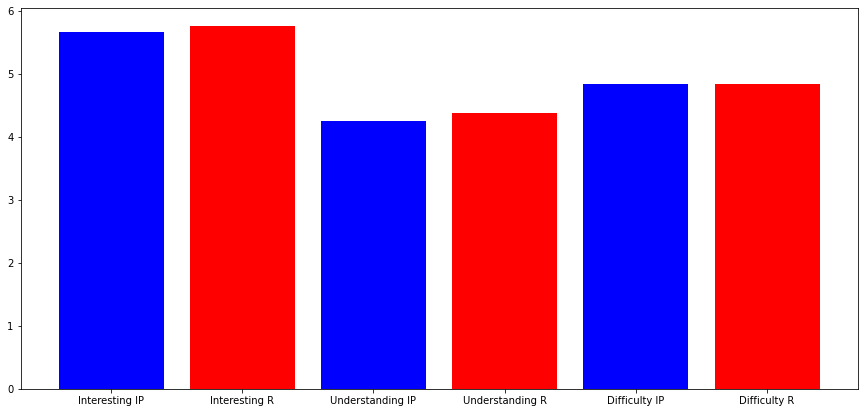

In [13]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# create a dataset
height = [average_rating_calculator(interesting_in_person), average_rating_calculator(interesting_remote), average_rating_calculator(understanding_in_person), average_rating_calculator(understanding_remote), average_rating_calculator(difficulty_in_person), average_rating_calculator(difficulty_remote)]
bars = ('Interesting IP', 'Interesting R', 'Understanding IP', 'Understanding R', 'Difficulty IP', 'Difficulty R')
x_pos = np.arange(len(bars))

# Create bars with different colors
plt.bar(x_pos, height, color=['blue', 'red', 'blue', 'red', 'blue', 'red'])

# Create names on the x-axis
plt.xticks(x_pos, bars)

# Show graph
plt.show()
plt.rcParams["figure.figsize"] = (15,7)

### Conclusions 
There are slight but insignificant differences in each of the interesting, understanding, and difficulty ratings between remote and in-person students. I was expecting there to be sizeable decreases in the interesting and understanding ratings for the remote learners and increases in difficulty ratings for remote learners because of the widespread dislike of online learning. These results can relect a number of things, including but not limited to (as a remote learner, my favorite reason,) successful online integration of COMP110 or students' acclimation to the online learning atmosphere. 